# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

NEED TO: 
Save PNG (plt.savefig) for each plot
Update the for loop to go through all of the cities (look for that rest thing eli talked about)
Write sentence for what each is

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# set up dataframe
weather_data = pd.DataFrame()
weather_data["lat"] = ''
weather_data['lng'] = ''
weather_data['max temp'] = ''
weather_data['humidity'] = ''
weather_data['cloudiness'] = ''
weather_data['wind speed'] = ''
weather_data['country'] = ''
weather_data['date'] = ''
# loop through cities (only do 10 right now)
for index, city in enumerate(cities[0:50]):
    # set up query url and access
    query_url = f"{base_url}&appid={weather_api_key}&q={city}"
    response = requests.get(query_url).json()
    print(f"Processing city number {index}  |  {city}")
    # try to import data into our dataframe
    try:
        weather_data.loc[index, "lng"] = response['coord']['lon']
        weather_data.loc[index, "lat"] = response['coord']['lat']
        weather_data.loc[index, "max temp"] = response['main']['temp_max']
        weather_data.loc[index, "humidity"] = response['main']['humidity']
        weather_data.loc[index, "cloudiness"] = response['clouds']['all']
        weather_data.loc[index, "wind speed"] = response['wind']['speed']
        weather_data.loc[index, "country"] = response['sys']['country']
        weather_data.loc[index, "date"] = response['dt']
    # if data not found print message
    except:
        print(f"{city} not found... skipping")

Processing city number 0  |  new norfolk
Processing city number 1  |  yen bai
Processing city number 2  |  klamath falls
Processing city number 3  |  taseyevo
Processing city number 4  |  bluff
Processing city number 5  |  rawson
Processing city number 6  |  atuona
Processing city number 7  |  saint-philippe
Processing city number 8  |  avarua
Processing city number 9  |  namibe
Processing city number 10  |  mar del plata
Processing city number 11  |  nueva loja
Processing city number 12  |  jamestown
Processing city number 13  |  la serena
Processing city number 14  |  portland
Processing city number 15  |  punta arenas
Processing city number 16  |  kaitangata
Processing city number 17  |  hamina
Processing city number 18  |  aklavik
Processing city number 19  |  east london
Processing city number 20  |  tomatlan
Processing city number 21  |  isiro
Processing city number 22  |  hobart
Processing city number 23  |  alpena
Processing city number 24  |  nizhneyansk
nizhneyansk not found.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
# export to csv
weather_data.to_csv("../output_data/weather_data.csv")
weather_data

,lat,lng,max temp,humidity,cloudiness,wind speed,country,date
0,-42.7826,147.0587,295.77,39,0,0.89,AU,1644111995
1,21.7,104.8667,287.06,81,88,0.44,VN,1644111996
2,42.2249,-121.7817,280.1,39,0,2.57,US,1644111873
3,57.2169,94.8978,265.32,92,100,3.02,RU,1644111997
4,-46.6,168.3333,288.04,59,14,4.94,NZ,1644111997
5,-43.3002,-65.1023,289.28,52,95,5.78,AR,1644111997
6,-9.8,-139.0333,299.31,75,30,9.41,PF,1644111998
7,-21.3585,55.7679,298.92,84,99,8.13,RE,1644111998
8,-21.2078,-159.775,301.18,78,20,7.2,CK,1644111998
9,-15.1961,12.1522,295.5,67,85,3.96,AO,1644111999


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[ weather_data["humidity"] > 100, : ]

,lat,lng,max temp,humidity,cloudiness,wind speed,country,date


In [31]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the weather_data DataFrame, which we call "city_df".
city_df = weather_data.loc[ weather_data["humidity"] <= 100, : ]
city_df.head()

,lat,lng,max temp,humidity,cloudiness,wind speed,country,date
0,-42.7826,147.0587,295.77,39,0,0.89,AU,1644111995
1,21.7,104.8667,287.06,81,88,0.44,VN,1644111996
2,42.2249,-121.7817,280.1,39,0,2.57,US,1644111873
3,57.2169,94.8978,265.32,92,100,3.02,RU,1644111997
4,-46.6,168.3333,288.04,59,14,4.94,NZ,1644111997


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

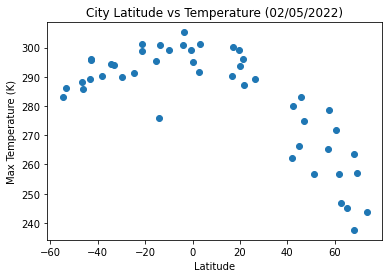

In [41]:
# convert columns into a series of ints
lat = city_df['lat'].astype(float)
temp = city_df["max temp"].astype(float)
# create scatter plot
plt.scatter(lat, temp)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title("City Latitude vs Temperature (02/05/2022)")
plt.show()

## Latitude vs. Humidity Plot

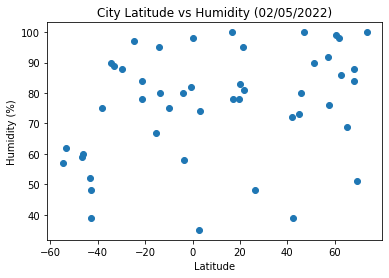

In [36]:
# convert columns into a series of ints
lat = city_df['lat'].astype(float)
humd = city_df["humidity"].astype(float)
# create scatter plot
plt.scatter(lat, humd)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (02/05/2022)")
plt.show()

## Latitude vs. Cloudiness Plot

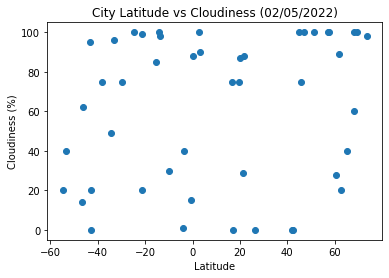

In [35]:
# convert columns into a series of ints
lat = city_df['lat'].astype(float)
cloud = city_df["cloudiness"].astype(float)
# create scatter plot
plt.scatter(lat, cloud)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (02/05/2022)")
plt.show()

## Latitude vs. Wind Speed Plot

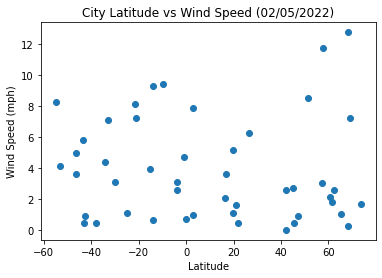

In [34]:
# convert columns into a series of ints
lat = city_df['lat'].astype(float)
wind = city_df["wind speed"].astype(float)
# create scatter plot
plt.scatter(lat, wind)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (02/05/2022)")
plt.show()

## Linear Regression

In [39]:
north = city_df.loc[ city_df["lat"] >= 0, : ]
south = city_df.loc[ city_df["lat"] < 0, : ]

,lat,lng,max temp,humidity,cloudiness,wind speed,country,date
0,-42.7826,147.0587,295.77,39,0,0.89,AU,1644111995
4,-46.6,168.3333,288.04,59,14,4.94,NZ,1644111997
5,-43.3002,-65.1023,289.28,52,95,5.78,AR,1644111997
6,-9.8,-139.0333,299.31,75,30,9.41,PF,1644111998
7,-21.3585,55.7679,298.92,84,99,8.13,RE,1644111998


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

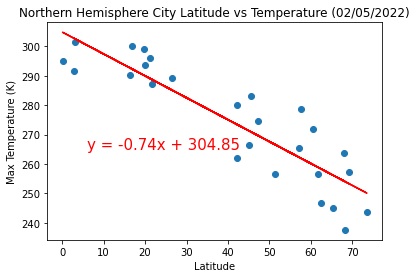

In [60]:
# convert columns into a series of ints
n_lat = north['lat'].astype(float)
n_temp = north["max temp"].astype(float)
# create scatter plot
plt.scatter(n_lat, n_temp)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title("Northern Hemisphere City Latitude vs Temperature (02/05/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_temp)
# this is equation for our line
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,265),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

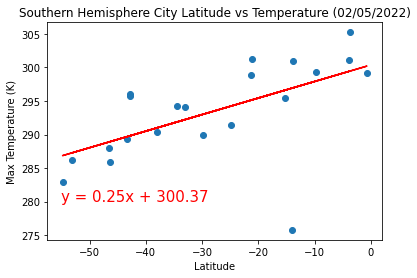

In [74]:
# convert columns into a series of ints
s_lat = south['lat'].astype(float)
s_temp = south["max temp"].astype(float)
# create scatter plot
plt.scatter(s_lat, s_temp)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (K)")
plt.title("Southern Hemisphere City Latitude vs Temperature (02/05/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_temp)
# this is equation for our line
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,280),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

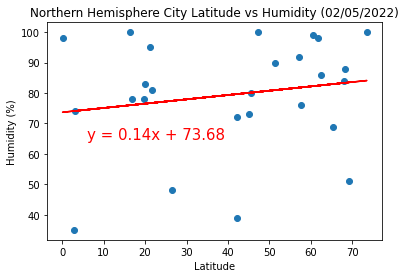

In [59]:
# convert columns into a series of ints
n_lat = north['lat'].astype(float)
n_hum = north["humidity"].astype(float)
# create scatter plot
plt.scatter(n_lat, n_hum)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere City Latitude vs Humidity (02/05/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_hum)
# this is equation for our line
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,65),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

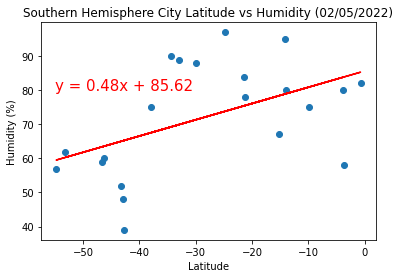

In [72]:
# convert columns into a series of ints
s_lat = south['lat'].astype(float)
s_humid = south["humidity"].astype(float)
# create scatter plot
plt.scatter(s_lat, s_humid)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere City Latitude vs Humidity (02/05/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_humid)
# this is equation for our line
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

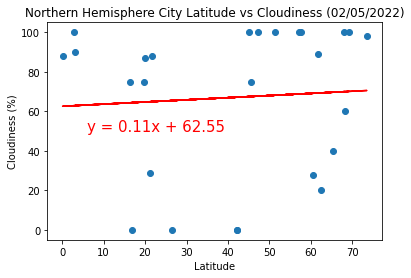

In [58]:
# convert columns into a series of ints
n_lat = north['lat'].astype(float)
n_cloud = north["cloudiness"].astype(float)
# create scatter plot
plt.scatter(n_lat, n_cloud)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere City Latitude vs Cloudiness (02/05/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
# this is equation for our line
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,50),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

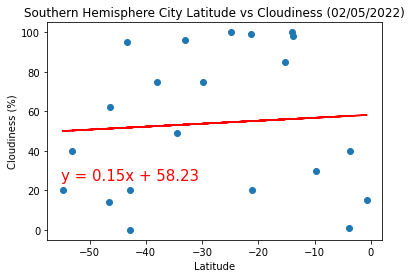

In [69]:
# convert columns into a series of ints
s_lat = south['lat'].astype(float)
s_cloud = south["cloudiness"].astype(float)
# create scatter plot
plt.scatter(s_lat, s_cloud)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere City Latitude vs Cloudiness (02/05/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
# this is equation for our line
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

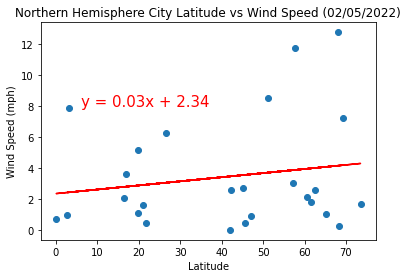

In [64]:
# convert columns into a series of ints
n_lat = north['lat'].astype(float)
n_wind = north["wind speed"].astype(float)
# create scatter plot
plt.scatter(n_lat, n_wind)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere City Latitude vs Wind Speed (02/05/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
# this is equation for our line
regress_values = n_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(n_lat,regress_values,"r-")
plt.annotate(line_eq,(6,8),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

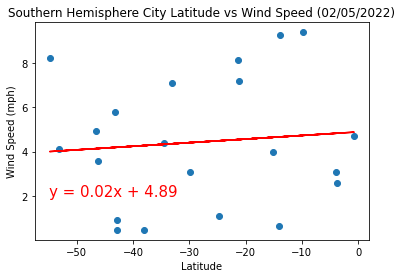

In [67]:
# convert columns into a series of ints
s_lat = south['lat'].astype(float)
s_wind = south["wind speed"].astype(float)
# create scatter plot
plt.scatter(s_lat, s_wind)
# format plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere City Latitude vs Wind Speed (02/05/2022)")

# create lin regress line
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_wind)
# this is equation for our line
regress_values = s_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot our line from above on top of scatter
plt.plot(s_lat,regress_values,"r-")
plt.annotate(line_eq,(-55,2),fontsize=15,color="red")
plt.show()